Citation Request:
  This dataset is public available for research. The details are described in [Moro et al., 2011]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

  Available at: [pdf] http://hdl.handle.net/1822/14838
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt

1. Title: Bank Marketing

2. Sources
   Created by: Paulo Cortez (Univ. Minho) and Sérgio Moro (ISCTE-IUL) @ 2012
   
3. Past Usage:

  The full dataset was described and analyzed in:

  S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, 
  Portugal, October, 2011. EUROSIS.

4. Relevant Information:

   The data is related with direct marketing campaigns of a Portuguese banking institution. 
   The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
   in order to access if the product (bank term deposit) would be (or not) subscrib.g. SVM).

   The classification goal is to predict if the client will subscribe a term deposit (variable y).

5. Number of Instances: 45211 for bank-full.csv (4521 for bank.csv)

6. Number of Attributes: 16 + output attribute.

7. Attribute information:

   For more information, read [Moro et al., 2011].

   Input variables:
   # bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   5 - default: has credit in default? (binary: "yes","no")
   6 - balance: average yearly balance, in euros (numeric) 
   7 - housing: has housing loan? (binary: "yes","no")
   8 - loan: has personal loan? (binary: "yes","no")
   # related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  10 - day: last contact day of the month (numeric)
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12 - duration: last contact duration, in seconds (numeric)
   # other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

8. Missing Attribute Values: None


In [85]:
import pandas as pd

bank = pd.read_csv('bank/bank.csv', sep=';')

In [86]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [87]:
bank_full = pd.read_csv('bank/bank-full.csv', sep=';')

bank_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [88]:
data = pd.concat([bank_full, bank], ignore_index=True)

data.drop_duplicates(inplace=True)

<Axes: >

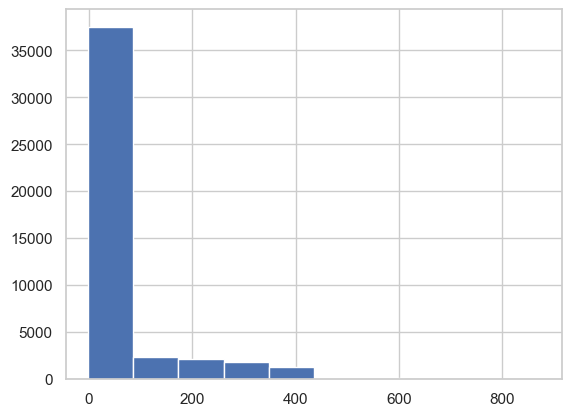

In [89]:
data['pdays'].hist()

In [5]:
data.shape

(45211, 17)

In [6]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


In [8]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
data['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

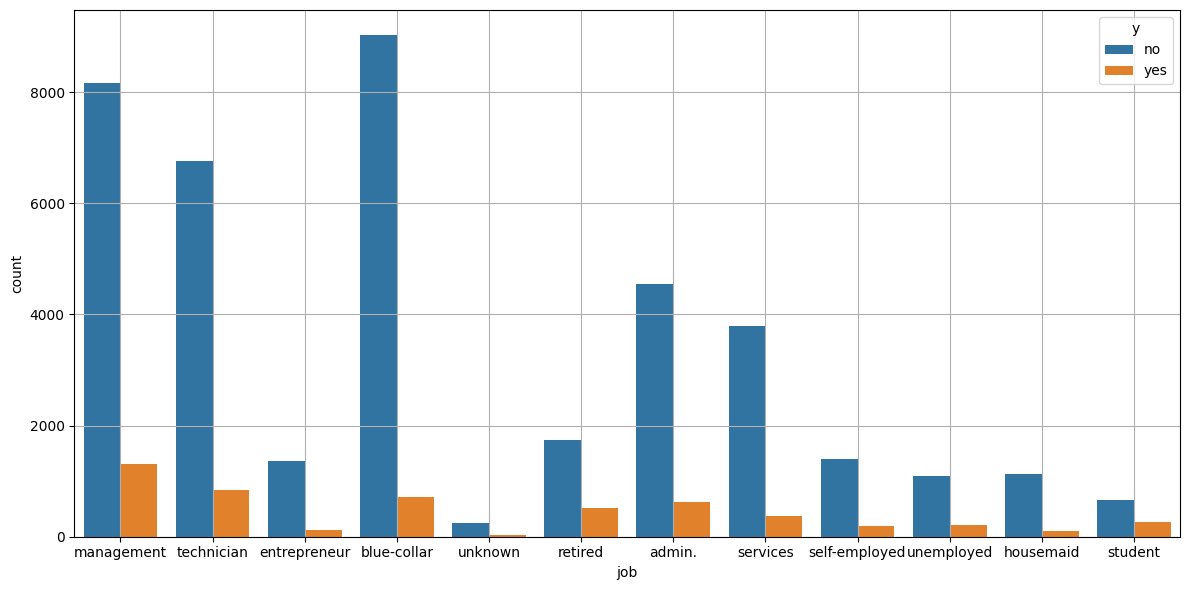

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

plt.figure(figsize=(12, 6))

sns.countplot(data=data, x='job', hue='y')
plt.tight_layout()
plt.grid(True)

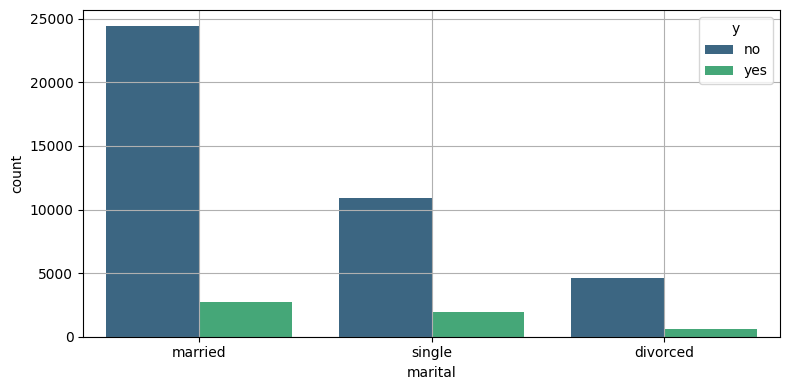

In [11]:
plt.figure(figsize=(8, 4))

sns.countplot(data=data, x='marital', hue='y', palette='viridis')
plt.tight_layout()
plt.grid(True)

<Axes: xlabel='age', ylabel='Count'>

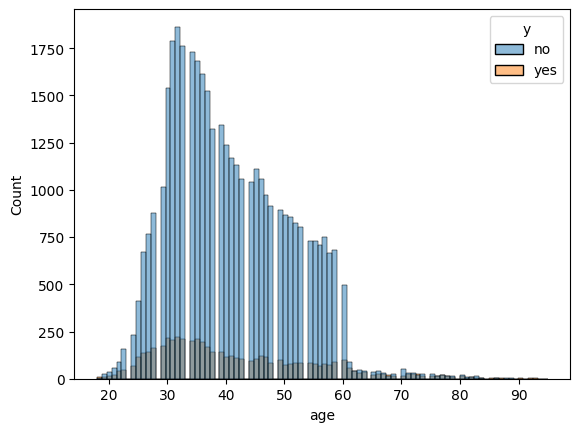

In [12]:
sns.histplot(data=data, x='age', hue='y')

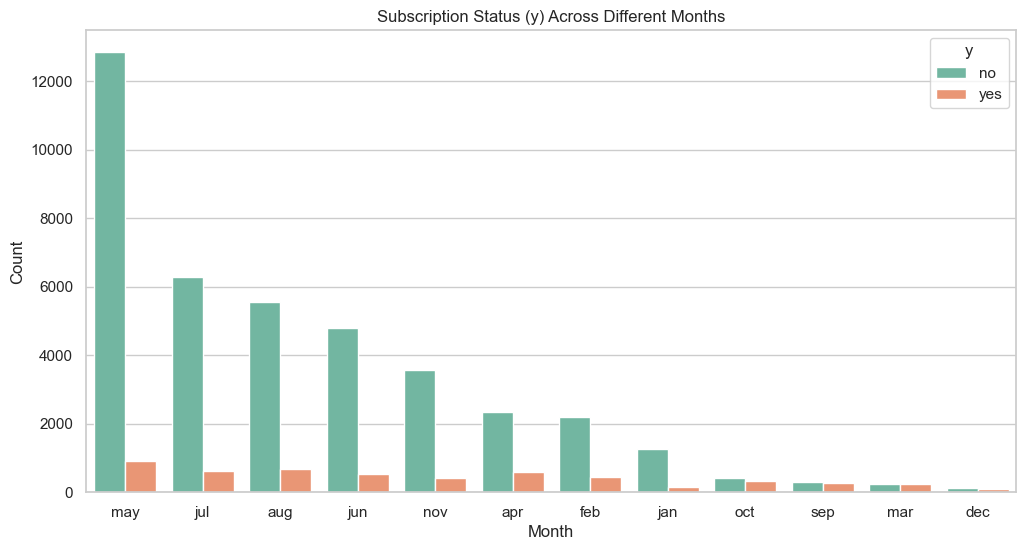

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
ax = sns.countplot(x='month', hue='y', data=data, palette='Set2', order = data['month'].value_counts().index)
plt.title('Subscription Status (y) Across Different Months')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()


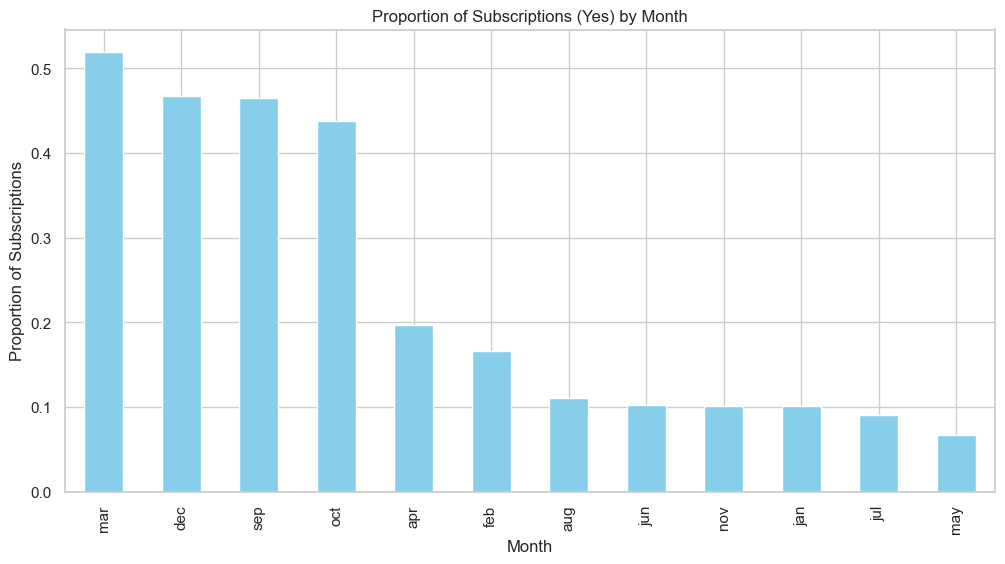

In [14]:
month_subscription_proportion = data.groupby('month')['y'].value_counts(normalize=True).unstack().fillna(0)
month_subscription_proportion = month_subscription_proportion.sort_values(by='yes', ascending=False)

plt.figure(figsize=(12, 6))
month_subscription_proportion['yes'].plot(kind='bar', color='skyblue')
plt.title('Proportion of Subscriptions (Yes) by Month')
plt.xlabel('Month')
plt.ylabel('Proportion of Subscriptions')
plt.show()


In [ ]:
data['pdays'].hist()

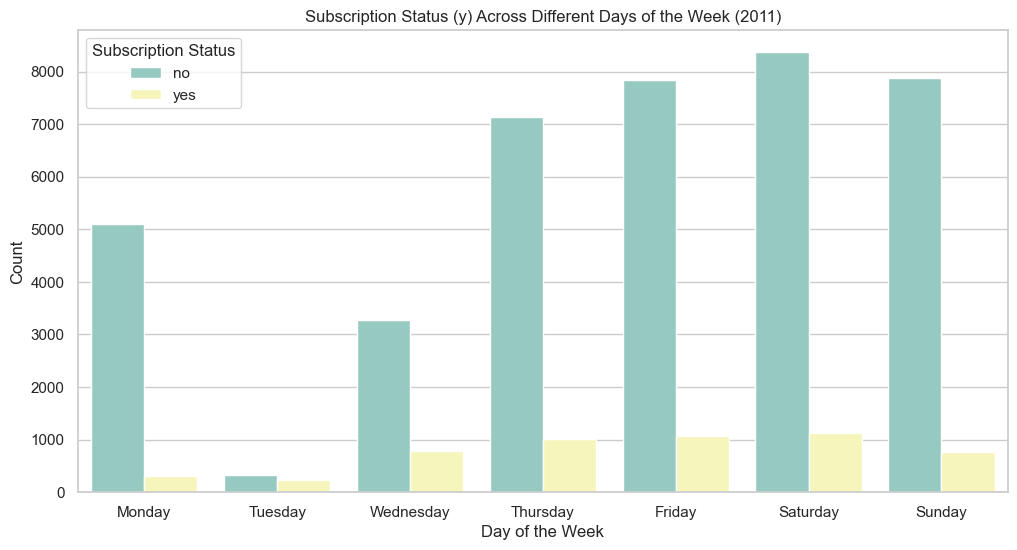

In [15]:
import calendar


data['date'] = pd.to_datetime(data['day'].astype(str) + '-' + data['month'] + '-2011', format='%d-%b-%Y')
data['day_of_week'] = data['date'].dt.day_name()

plt.figure(figsize=(12, 6))
ax = sns.countplot(x='day_of_week', hue='y', data=data, palette='Set3', order=calendar.day_name)
plt.title('Subscription Status (y) Across Different Days of the Week (2011)')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.legend(title='Subscription Status')
plt.show()


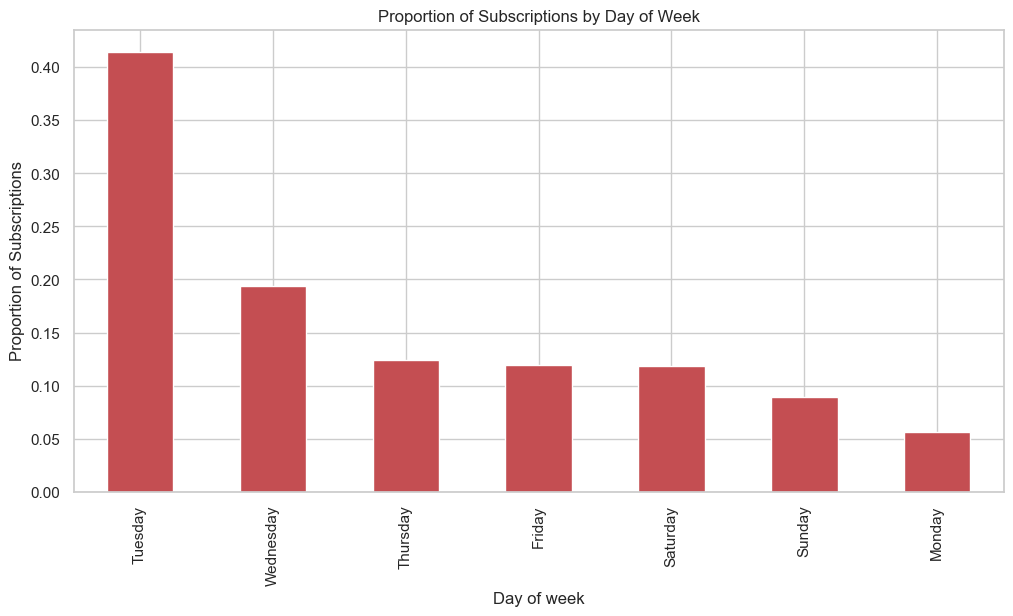

In [60]:
dayofweek_subscription_proportion = data.groupby('day_of_week')['y'].value_counts(normalize=True).unstack().fillna(0)
dayofweek_subscription_proportion =dayofweek_subscription_proportion.sort_values(by=1, ascending=False)

plt.figure(figsize=(12, 6))
dayofweek_subscription_proportion[1].plot(kind='bar', color='r')
plt.title('Proportion of Subscriptions by Day of Week')
plt.xlabel('Day of week')
plt.ylabel('Proportion of Subscriptions')
plt.show()


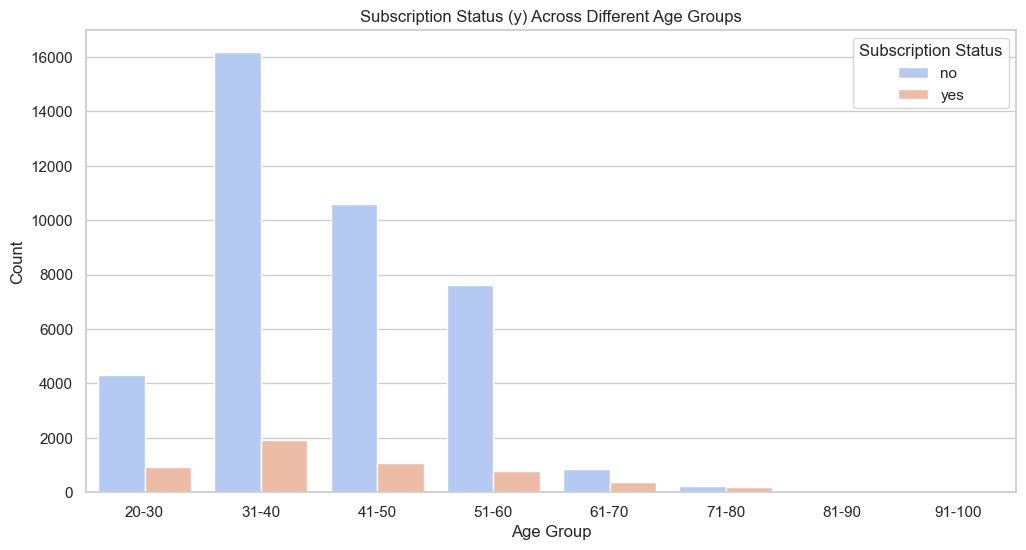

In [17]:
bins = [20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['20-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(12, 6))
ax = sns.countplot(x='age_group', hue='y', data=data, palette='coolwarm')
plt.title('Subscription Status (y) Across Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Subscription Status')
plt.show()


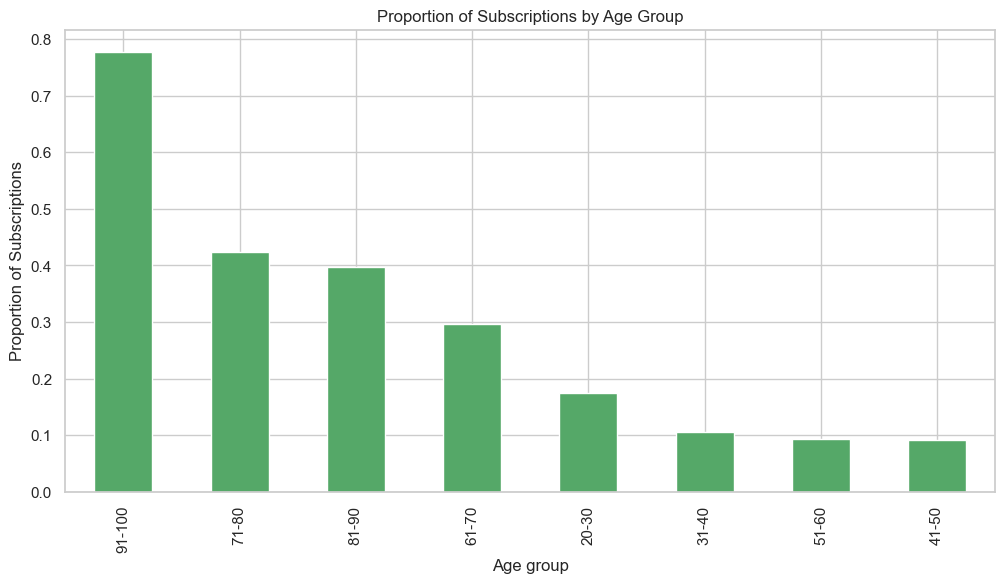

In [63]:
agegroup_subscription_proportion = data.groupby('age_group')['y'].value_counts(normalize=True).unstack().fillna(0)
agegroup_subscription_proportion = agegroup_subscription_proportion.sort_values(by=1, ascending=False)

plt.figure(figsize=(12, 6))
agegroup_subscription_proportion[1].plot(kind='bar', color='g')
plt.title('Proportion of Subscriptions by Age Group')
plt.xlabel('Age group')
plt.ylabel('Proportion of Subscriptions')
plt.show()

In [80]:
def categorize_pdays(pdays):
    if pdays == -1:
        return 'not contacted'
    elif pdays <= 30:
        return 'last month'
    elif pdays <= 90:
        return 'last 3 months'
    elif pdays <= 180:
        return 'last 6 months'
    else:
        return 'last year or more'

data['pdays_category'] = data['pdays'].apply(categorize_pdays)

data[['pdays_category']].head()


,pdays_category
0,not contacted
1,not contacted
2,not contacted
3,not contacted
4,not contacted


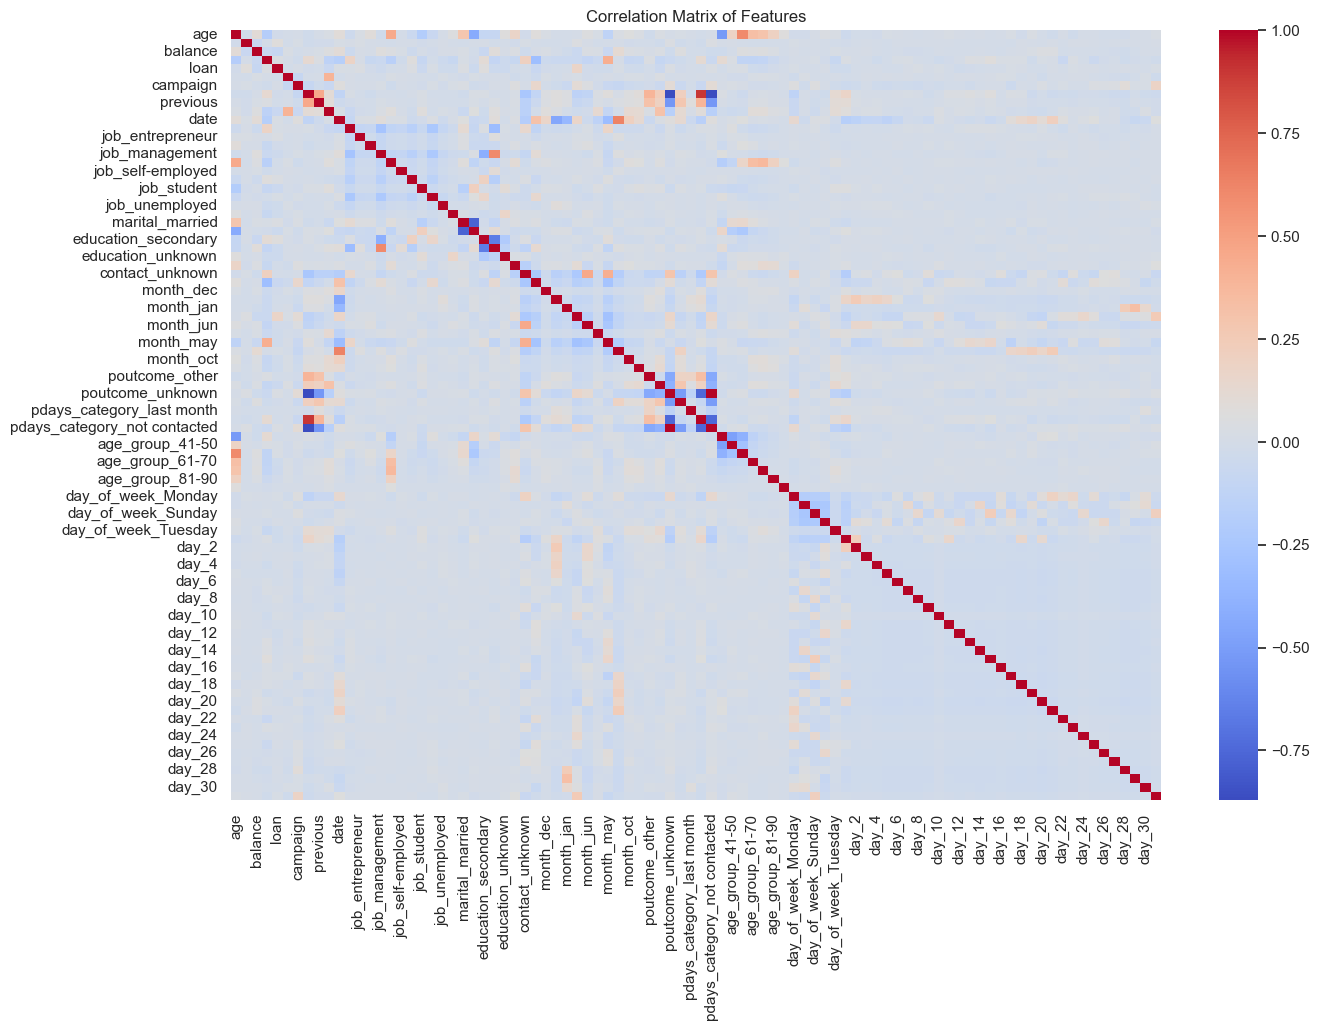

In [19]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

binary_cols = ['default', 'housing', 'loan', 'y']
label_encoder = LabelEncoder()
for col in binary_cols:
    data[col] = label_encoder.fit_transform(data[col])

categorical_cols = ['job', 'marital', 'education', 'contact', 'month', 'poutcome', 'pdays_category', 'age_group', 'day_of_week', 'day']
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

correlation_matrix = data_encoded.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

In [20]:
correlation_with_target = correlation_matrix['y'].sort_values(ascending=False)
correlation_with_target

y                               1.000000
duration                        0.394521
poutcome_success                0.306788
month_mar                       0.129456
month_oct                       0.128531
                                  ...   
month_may                      -0.102500
housing                        -0.139173
contact_unknown                -0.150935
poutcome_unknown               -0.167051
pdays_category_not contacted   -0.167263
Name: y, Length: 90, dtype: float64

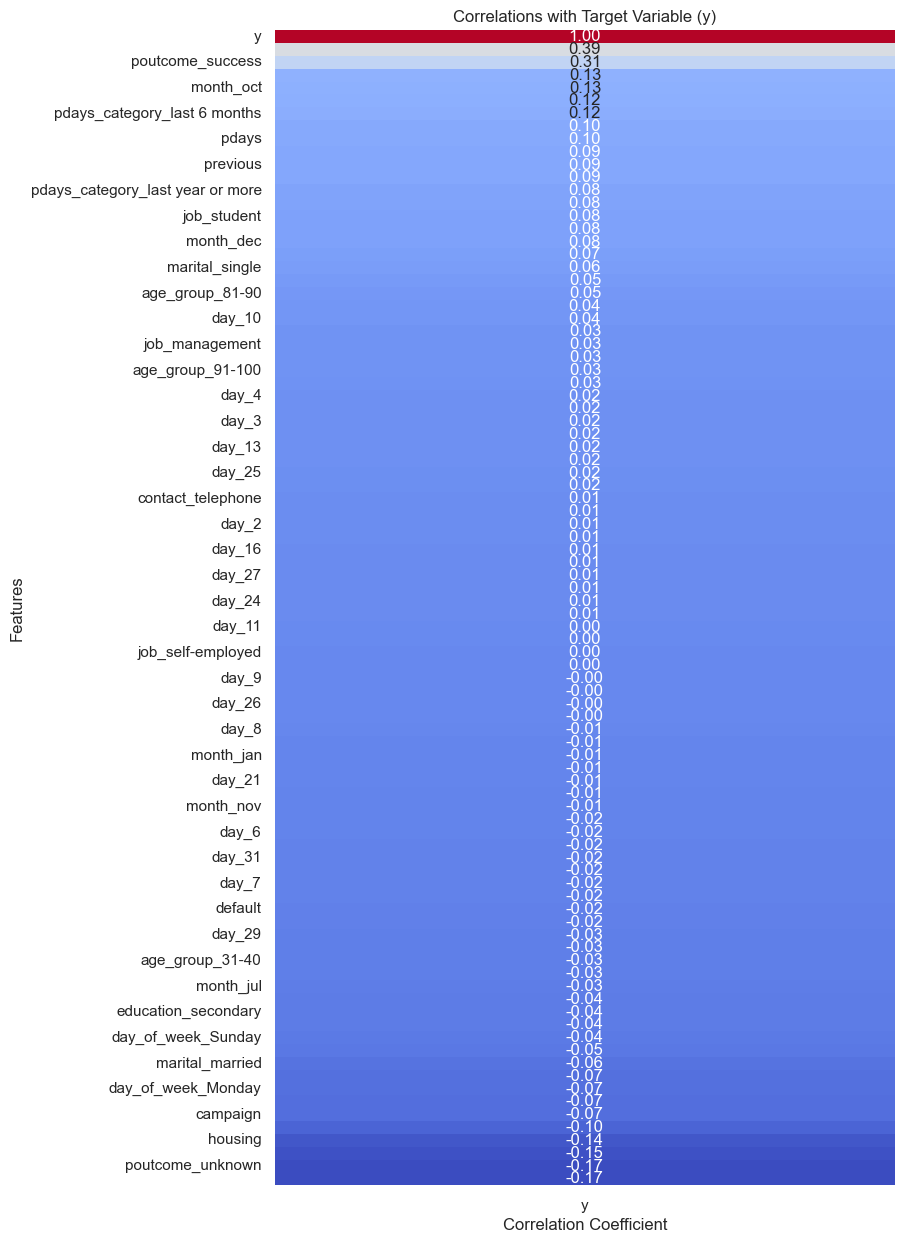

In [21]:
import numpy as np


plt.figure(figsize=(8, 15))
sns.heatmap(pd.DataFrame(correlation_with_target), annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title('Correlations with Target Variable (y)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()


In [22]:
correlation_threshold = 0.7

strong_correlations = (correlation_matrix.abs() > correlation_threshold) & (correlation_matrix != 1)
pairs = correlation_matrix[strong_correlations].stack().reset_index()
pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']

pairs = pairs.loc[pairs['Feature 1'] < pairs['Feature 2']]
pairs.sort_values(by='Correlation', ascending=False, inplace=True)

pairs.reset_index(drop=True, inplace=True)
pairs

,Feature 1,Feature 2,Correlation
0,pdays_category_not contacted,poutcome_unknown,0.999630
1,pdays,pdays_category_last year or more,0.900998
2,pdays_category_last year or more,poutcome_unknown,-0.750661
3,pdays_category_last year or more,pdays_category_not contacted,-0.750928
4,marital_married,marital_single,-0.772357
5,pdays,poutcome_unknown,-0.869962
6,pdays,pdays_category_not contacted,-0.870442


In [23]:
data_encoded.drop('pdays', axis=1, inplace=True)

In [24]:
data_encoded.drop('poutcome_unknown', axis=1, inplace=True)

In [25]:
data_encoded.drop('date', axis=1, inplace=True)

In [26]:
correlation_matrix_upd = data_encoded.corr()

strong_correlations_upd = (correlation_matrix_upd.abs() > correlation_threshold) & (correlation_matrix_upd != 1)
pairs_upd = correlation_matrix_upd[strong_correlations_upd].stack().reset_index()
pairs_upd.columns = ['Feature 1', 'Feature 2', 'Correlation']

pairs_upd = pairs_upd.loc[pairs_upd['Feature 1'] < pairs_upd['Feature 2']]
pairs_upd.sort_values(by='Correlation', ascending=False, inplace=True)

pairs_upd.reset_index(drop=True, inplace=True)
pairs_upd

,Feature 1,Feature 2,Correlation
0,pdays_category_last year or more,pdays_category_not contacted,-0.750928
1,marital_married,marital_single,-0.772357


In [27]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['age', 'balance', 'duration', 'previous']

scaler = StandardScaler()

data_encoded[columns_to_scale] = scaler.fit_transform(data_encoded[columns_to_scale])

data_encoded.head()


,age,default,balance,housing,loan,duration,campaign,previous,y,job_blue-collar,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
0,1.606965,0,0.256419,1,0,0.011016,1,-0.25194,0,False,...,False,False,False,False,False,False,False,False,False,False
1,0.288529,0,-0.437895,1,0,-0.416127,1,-0.25194,0,False,...,False,False,False,False,False,False,False,False,False,False
2,-0.747384,0,-0.446762,1,1,-0.707361,1,-0.25194,0,False,...,False,False,False,False,False,False,False,False,False,False
3,0.571051,0,0.047205,1,0,-0.645231,1,-0.25194,0,True,...,False,False,False,False,False,False,False,False,False,False
4,-0.747384,0,-0.447091,0,0,-0.233620,1,-0.25194,0,False,...,False,False,False,False,False,False,False,False,False,False


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import pandas as pd

X = data_encoded.drop('y', axis=1)
y = data_encoded['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

from sklearn.ensemble import VotingClassifier


models_for_voting = [
    ('logistic_regression', LogisticRegression()),
    ('decision_tree', DecisionTreeClassifier()),
    ('random_forest', RandomForestClassifier()),
    ('SVC', SVC(probability=True)),
    ('knn', KNeighborsClassifier()),
    ('adaboost', AdaBoostClassifier()),
    ('gradient_boosting', GradientBoostingClassifier()),
    ('xgboost', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
]

voting_clf_hard = VotingClassifier(estimators=models_for_voting, voting='hard')

voting_clf_soft = VotingClassifier(estimators=models_for_voting, voting='soft')

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "VotingClassifier_soft": voting_clf_soft,
    "VotingClassifier_hard": voting_clf_hard,
}

results_df = pd.DataFrame(columns=["Model", "Precision", "Recall", "F1 Score"])
results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = None

    if model_name == 'K-Nearest Neighbors':
        y_pred = model.predict(X_test.values)
    else:
        y_pred = model.predict(X_test)
        
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    
    results.append({
        "Model": model_name,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

results_df = pd.DataFrame(results)
results_df


,Model,Precision,Recall,F1 Score
0,Logistic Regression,0.645349,0.349716,0.453617
1,Decision Tree,0.462222,0.458727,0.460468
2,Random Forest,0.674825,0.364839,0.473620
3,Support Vector Machine,0.643855,0.290485,0.400347
4,K-Nearest Neighbors,0.585052,0.286074,0.384257
5,AdaBoost,0.605076,0.375551,0.463453
6,Gradient Boosting,0.648734,0.387524,0.485207
7,XGBoost,0.617968,0.463768,0.529878
8,VotingClassifier_soft,0.664036,0.371141,0.476152
9,VotingClassifier_hard,0.670604,0.321991,0.435079


In [31]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y),
    y=y
)
weights_dict = {i: weight for i, weight in enumerate(class_weights)}

In [32]:
from sklearn.model_selection import GridSearchCV

param_grid_lr = {'C': range(1, 20, 1), 
                 'penalty': ['l1', 'l2'],
                 'class_weight': ['balanced', None, weights_dict, 'balanced_subsample'], 
                 'solver': ['liblinear', 'adam', 'lbfgs']}

grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, scoring='f1', cv=5, refit=True)
grid_search_lr.fit(X_train, y_train)
best_params_lr = grid_search_lr.best_params_

In [33]:
best_params_lr

{'C': 8,
 'class_weight': {0: 0.566241671258955, 1: 4.274059368500661},
 'penalty': 'l2',
 'solver': 'lbfgs'}

In [34]:
best_lr_model = grid_search_lr.best_estimator_

y_pred_lr = best_lr_model.predict(X_test)
precision_lr = precision_score(y_test, y_pred_lr, pos_label=1)
recall_lr = recall_score(y_test, y_pred_lr, pos_label=1)
f1_lr = f1_score(y_test, y_pred_lr, pos_label=1)

In [35]:
f1_lr

0.5598272138228942

In [70]:
from sklearn.model_selection import RandomizedSearchCV

import warnings

warnings.filterwarnings('ignore')
dt = DecisionTreeClassifier()

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None] + [md for md in range(2, 40, 4)],
    'min_samples_split': [2, 5, 7, 9],
    'min_samples_leaf': [1, 2, 4, 5],
    'class_weight': ['balanced', 'balanced_subsample', None, weights_dict]}


grid_search_dt = GridSearchCV(dt, param_grid=param_grid_dt, cv=5, n_jobs=-1, refit=True)

grid_search_dt.fit(X_train, y_train)

best_params_dt = grid_search_dt.best_params_
best_estimator_dt = grid_search_dt.best_estimator_

print("Best Parameters:", best_params_dt)
y_pred_dt = best_estimator_dt.predict(X_test)

precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1 Score:", f1_dt)


Best Parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 9}
Precision: 0.6091836734693877
Recall: 0.37359198998748433
F1 Score: 0.46314972847168345


In [36]:
from sklearn.model_selection import RandomizedSearchCV

X = data_encoded.drop('y', axis=1)
y = data_encoded['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(random_state=42)

param_dist = {"max_depth": range(2, 30, 4),
              'n_estimators': range(100, 600, 100),
              "max_features": range(1, 11),
              "min_samples_split": range(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"],
             'class_weight': ['balanced', 'balanced_subsample', None, weights_dict]}

random_search_rf = RandomizedSearchCV(rf, param_distributions=param_dist,
                                   n_iter=100, cv=5, random_state=42, scoring='f1', refit=True, n_jobs=-1)

random_search_rf.fit(X_train, y_train)

best_params_rf = random_search_rf.best_params_
best_score_rf = random_search_rf.best_score_
best_estimator_rf = random_search_rf.best_estimator_

print("Best Parameters:", best_params_rf)
print("Best Score:", best_score_rf)

Best Parameters: {'n_estimators': 200, 'min_samples_split': 6, 'max_features': 10, 'max_depth': 18, 'criterion': 'entropy', 'class_weight': {0: 0.566241671258955, 1: 4.274059368500661}, 'bootstrap': True}
Best Score: 0.6006546393611848


In [38]:
y_pred_rf = best_estimator_rf.predict(X_test)
recall_rf = recall_score(y_test, y_pred_rf, pos_label=1)
precision_rf = precision_score(y_test, y_pred_rf, pos_label=1)
f1_rf = f1_score(y_test, y_pred_rf, pos_label=1)

print("Recall:", recall_rf)
print("Precision:", precision_rf)
print("F1 Score:", f1_rf)

Recall: 0.7365456821026283
Precision: 0.5086430423509075
F1 Score: 0.6017382413087935


In [49]:
import warnings

warnings.filterwarnings('ignore')

svc = SVC(random_state=42, proba)

param_dist = {
    'C': [0.01, 0.1, 1, 10, 100], 
    'gamma': np.arange(0.01, 0.1, 0.01),
    'kernel': ['rbf', 'linear', 'poly']
}

random_search_svc = RandomizedSearchCV(svc, param_distributions=param_dist, scoring='f1', refit=True, n_jobs=-1,
                                       n_iter=20, cv=5, random_state=42)

random_search_svc.fit(X_train, y_train)

best_params_svc = random_search_svc.best_params_
best_score_svc = random_search_svc.best_score_
best_estimator_svc = random_search_svc.best_estimator_

print("Best Parameters:", best_params_svc)
print("Best Score:", best_score_svc)

/Users/dauletbaktibayev/anaconda3/lib/python3.10/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator SVC from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/dauletbaktibayev/anaconda3/lib/python3.10/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator SVC from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/dauletbaktibayev/anaconda3/lib/python3.10/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator SVC from version 1.3.0 when using version 1.3.2. 

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/dauletbaktibayev/anaconda3/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/m_/qqp_gzj50tg_fmmct92z5s1r0000gn/T/ipykernel_1514/2605419614.py", line 14, in <module>
    random_search_svc.fit(X_train, y_train)
  File "/Users/dauletbaktibayev/anaconda3/lib/python3.10/site-packages/sklearn/base.py", line 1151, in wrapper
    ):
  File "/Users/dauletbaktibayev/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_search.py", line 898, in fit
    self._run_search(evaluate_candidates)
  File "/Users/dauletbaktibayev/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_search.py", line 1806, in _run_search
  File "/Users/dauletbaktibayev/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_search.py", line 845, in evaluate_candidates
    out = parallel(
  File "/Users/dauletbaktibayev/anaconda3/lib/pyt

In [ ]:
y_pred_svc = best_estimator_svc.predict(X_test)

recall_svc = recall_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc)
f1_svc = f1_score(y_test, y_pred_svc)

print("Recall for SVC:", recall_svc)
print("Precision for SVC:", precision_svc)
print("F1 Score for SVC:", f1_svc)


In [39]:
import warnings
warnings.filterwarnings('ignore')

ada = AdaBoostClassifier(random_state=42)

param_dist = {
    'n_estimators': range(50, 500, 50),
    'learning_rate': np.arange(0.1, 1.1, 0.1),
    'base_estimator': [best_estimator_rf, None]
}

random_search_ada = RandomizedSearchCV(ada, param_distributions=param_dist, 
                                       n_iter=20, cv=5, random_state=42, scoring='f1', refit=True, n_jobs=-1)

random_search_ada.fit(X_train, y_train)

best_params_ada = random_search_ada.best_params_
best_estimator_ada = random_search_ada.best_estimator_
best_score_ada = random_search_ada.best_score_

print("Best Parameters:", best_params_ada)


/Users/dauletbaktibayev/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/dauletbaktibayev/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/dauletbaktibayev/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/dauletbaktibayev/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/dauletbaktibayev/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estima

Best Parameters: {'n_estimators': 100, 'learning_rate': 0.30000000000000004, 'base_estimator': RandomForestClassifier(class_weight={0: 0.566241671258955,
                                     1: 4.274059368500661},
                       criterion='entropy', max_depth=18, max_features=10,
                       min_samples_split=6, n_estimators=200, random_state=42)}


In [47]:
y_pred_ada = best_estimator_ada.predict(X_test)

precision_ada = precision_score(y_test, y_pred_ada,pos_label=1)
recall_ada = recall_score(y_test, y_pred_ada, pos_label=1)
f1_ada = f1_score(y_test, y_pred_ada, pos_label=1)

print("Precision:", precision_ada)
print("Recall:", recall_ada)
print("F1 Score:", f1_ada)

Precision: 0.5844311377245509
Recall: 0.6107634543178974
F1 Score: 0.5973072215422276


In [42]:
knn = KNeighborsClassifier()

params_knn = {
    'n_neighbors': range(1, 30),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(knn, params_knn, n_jobs = -1,
                                        cv=5, refit=True, scoring = 'f1')

grid_search_knn.fit(X_train.values, y_train.values)

best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_
best_estimator_knn = grid_search_knn.best_estimator_

print("Best Parameters:", best_params_knn)
print("Best Score:", best_score_knn)



Best Parameters: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
Best Score: 0.4215477973051224


In [43]:
y_pred_knn = best_estimator_knn.predict(X_test.values)

precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)

Precision: 0.46258503401360546
Recall: 0.3829787234042553
F1 Score: 0.4190345771995892


In [48]:
gb = GradientBoostingClassifier(random_state=42)

param_dist_gb = {
    'n_estimators': range(100, 500, 50),
    'learning_rate': np.arange(0.2, 2.2, 2),
    'max_depth': range(2, 40, 4),
    'max_features': ['sqrt', 'log2', None],
}

random_search_gb = RandomizedSearchCV(gb, param_distributions=param_dist_gb, 
                                      n_iter=40, cv=5, random_state=42, n_jobs=-1, refit=True, scoring='f1')

random_search_gb.fit(X_train, y_train)

best_params_gb = random_search_gb.best_params_
best_score_gb = random_search_gb.best_score_
best_estimator_gb = random_search_gb.best_estimator_

print("Best Parameters:", best_params_gb)
print("Best Score:", best_score_gb)


Best Parameters: {'n_estimators': 400, 'max_features': 'sqrt', 'max_depth': 6, 'learning_rate': 0.2}
Best Score: 0.5352257787700774


In [49]:
y_pred_gb = best_estimator_gb.predict(X_test)

precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)

print("Precision:", precision_gb)
print("Recall:", recall_gb)
print("F1 Score:", f1_gb)

Precision: 0.6257961783439491
Recall: 0.4918648310387985
F1 Score: 0.5508058864751227


In [52]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

param_dist_xgb = {
    'n_estimators': range(100, 500, 50),
    'learning_rate': np.arange(0.1, 1.1, 0.1),
    'max_depth': range(2, 40, 4),
    'colsample_bytree': np.arange(0.4, 0.9, 0.1),
    'class_weight': ['balanced', 'balanced_subsample', None, weights_dict]
}

random_search_xgb = RandomizedSearchCV(xgb, param_distributions=param_dist_xgb, 
                                       n_iter=40, cv=5, random_state=42, n_jobs=-1, refit=True, scoring='f1')

random_search_xgb.fit(X_train, y_train)

best_params_xgb = random_search_xgb.best_params_
best_score_xgb = random_search_xgb.best_score_
best_estimator_xgb = random_search_xgb.best_estimator_

print("Best Parameters:", best_params_xgb)
print("Best Score:", best_score_xgb)

/Users/dauletbaktibayev/anaconda3/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/dauletbaktibayev/anaconda3/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/dauletbaktibayev/anaconda3/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/dauletbaktibayev/anaconda3/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categoric

[21:34:32] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "class_weight" } are not used.

Best Parameters: {'n_estimators': 100, 'max_depth': 2, 'learning_rate': 1.0, 'colsample_bytree': 0.7999999999999999, 'class_weight': {0: 0.566241671258955, 1: 4.274059368500661}}
Best Score: 0.5244988059462438


In [53]:
y_pred_xgb = best_estimator_xgb.predict(X_test)

precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1 Score:", f1_xgb)


Precision: 0.636936936936937
Recall: 0.44242803504380473
F1 Score: 0.5221565731166913


In [56]:
from sklearn.ensemble import VotingClassifier


models = [
    ('logistic_regression', best_lr_model),
    ('decision_tree', decision_tree_model),
    ('random_forest', best_estimator_rf),
    ('knn', knn_model),
    ('adaboost', best_estimator_ada),
    ('gradient_boosting', best_estimator_ada),
    ('xgboost', best_estimator_xgb)
]

voting_clf_hard = VotingClassifier(estimators=models, voting='hard')

voting_clf_soft = VotingClassifier(estimators=models, voting='soft')

voting_clf_hard.fit(X_train, y_train)

voting_clf_soft.fit(X_train, y_train)


y_pred_hard = voting_clf_hard.predict(X_test)

y_pred_soft = voting_clf_soft.predict(X_test)

precision_hard = precision_score(y_test, y_pred_hard)
recall_hard = recall_score(y_test, y_pred_hard)
f1_score_hard = f1_score(y_test, y_pred_hard)

precision_soft = precision_score(y_test, y_pred_soft)
recall_soft = recall_score(y_test, y_pred_soft)
f1_score_soft = f1_score(y_test, y_pred_soft)

print("Hard Voting Classifier:")
print("Precision:", precision_hard)
print("Recall:", recall_hard)
print("F1 Score:", f1_score_hard)

print("\nSoft Voting Classifier:")
print("Precision:", precision_soft)
print("Recall:", recall_soft)
print("F1 Score:", f1_score_soft)




[20:59:35] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "class_weight" } are not used.

[21:00:54] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "class_weight" } are not used.

[21:02:34] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "class_weight" } are not used.

[21:04:33] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "class_weight" } are not used.

[21:07:54] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "class_weight" } are not used.

[21:10:35] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build

In [77]:
models_final = {
    "Logistic Regression with Hyperparameters tuned": [precision_lr, recall_lr, f1_lr],
    "Decision Tree with Hyperparameters tuned": [precision_dt, recall_dt, f1_dt],
    "Random Forest with Hyperparameters tuned": [precision_rf, recall_rf, f1_rf],
    "K-Nearest Neighbors with Hyperparameters tuned": [precision_knn, recall_knn, f1_knn],
    "AdaBoost with Hyperparameters tuned": [precision_ada, recall_ada, f1_ada],
    "Gradient Boosting with Hyperparameters tuned": [precision_gb, recall_gb, f1_gb],
    "XGBoost with Hyperparameters tuned": [precision_xgb, recall_xgb, f1_xgb],
    "VotingClassifier_soft of models with Hyperparameters tuned": [precision_soft, recall_soft, f1_score_soft],
    "VotingClassifier_hard of models with Hyperparameters tuned": [precision_hard, recall_hard, f1_score_hard],
}

results_df_updated = pd.DataFrame(columns=["Model", "Precision", "Recall", "F1 Score"])
results_final = []

for model_name, scores in models_final.items():
    results_final.append({
        "Model": model_name,
        "Precision": scores[0],
        "Recall": scores[1],
        "F1 Score": scores[2]
    })

results_df_updated = pd.DataFrame(results_final)
results_df_updated

,Model,Precision,Recall,F1 Score
0,Logistic Regression with Hyperparameters tuned,0.425895,0.816635,0.559827
1,Decision Tree with Hyperparameters tuned,0.609184,0.373592,0.463150
2,Random Forest with Hyperparameters tuned,0.508643,0.736546,0.601738
3,K-Nearest Neighbors with Hyperparameters tuned,0.462585,0.382979,0.419035
4,AdaBoost with Hyperparameters tuned,0.584431,0.610763,0.597307
5,Gradient Boosting with Hyperparameters tuned,0.625796,0.491865,0.550806
6,XGBoost with Hyperparameters tuned,0.636937,0.442428,0.522157
7,VotingClassifier_soft of models with Hyperpara...,0.559271,0.690864,0.618141
8,VotingClassifier_hard of models with Hyperpara...,0.578765,0.627660,0.602222


In [79]:
results_df_updated.sort_values(by='F1 Score', ascending=False)

,Model,Precision,Recall,F1 Score
7,VotingClassifier_soft of models with Hyperpara...,0.559271,0.690864,0.618141
8,VotingClassifier_hard of models with Hyperpara...,0.578765,0.627660,0.602222
2,Random Forest with Hyperparameters tuned,0.508643,0.736546,0.601738
4,AdaBoost with Hyperparameters tuned,0.584431,0.610763,0.597307
0,Logistic Regression with Hyperparameters tuned,0.425895,0.816635,0.559827
5,Gradient Boosting with Hyperparameters tuned,0.625796,0.491865,0.550806
6,XGBoost with Hyperparameters tuned,0.636937,0.442428,0.522157
1,Decision Tree with Hyperparameters tuned,0.609184,0.373592,0.463150
3,K-Nearest Neighbors with Hyperparameters tuned,0.462585,0.382979,0.419035
